# Generating IC's given a power spectrum

In [1]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

In [2]:
# load binary files
file = '../data/z0.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    rho = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
rho = rho.reshape(N, N, N)
rho *= 2.777 * 10**11

rho = rho[::4, ::4, ::4]
N = 64

MPH_h = 60

delta = cosmax.helpers.compute_overdensity(rho)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


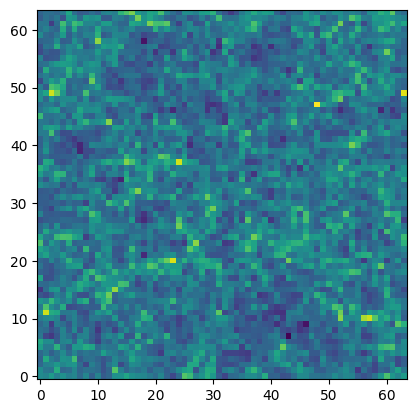

In [3]:
# plot data
plt.figure()
plt.imshow(jnp.log(rho[N//2]), origin='lower')

In [9]:
scaling = 0.00001
pos_lag, pos, mass = cosmax.tools.fit_field(
    key=jax.random.PRNGKey(0),
    elements=N,
    field=rho * scaling,
    total_mass=jnp.sum(rho * scaling),
    iterations=300,
    learning_rate=0.001)

mass = mass / scaling

Loss: 0.0099684689193964, Iteration: 0
Loss: 0.00467248260974884, Iteration: 30
Loss: 0.0033693232107907534, Iteration: 60
Loss: 0.002639445709064603, Iteration: 90
Loss: 0.0021777141373604536, Iteration: 120
Loss: 0.0018012991640716791, Iteration: 150
Loss: 0.0015070820227265358, Iteration: 180
Loss: 0.0011580352438613772, Iteration: 210
Loss: 0.00088568712817505, Iteration: 240
Loss: 0.000606423884164542, Iteration: 270


In [10]:
print(pos.shape)
print(pos.min(axis=1), pos.max(axis=1))

(3, 262144)
[0.0000000e+00 4.8163054e-07 1.1920929e-07] [0.99999976 1.         0.99999964]


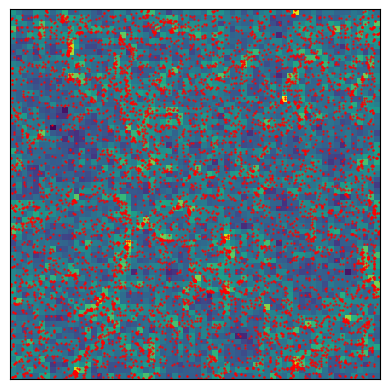

In [12]:
plt.figure()

pos_silce_mask = jnp.abs(pos[0] - 0.5) < (1.0 / N)

plt.imshow(jnp.log(rho[N//2]).T, origin='lower')
plt.xticks([])
plt.yticks([])

offset = 1 / N

plt.scatter(pos[1][pos_silce_mask]*N - 0.5, pos[2][pos_silce_mask]* N-0.5, c='r', s=0.3)
